THIAW Mouhamadou Lamine Bara

# Simulating hard spheres with Monte Carlo

Notebook written by [Manon Michel](manon.michel@uca.fr)

The goal here is to sample hard spheres systems. 

Hard spheres interact through an exclusion force, meaning that they cannot overlap. For a given diameter $\sigma>0$, the stationary probability distribution for of $N$ spheres in dimension $d$ in a square box of size $L$ with periodic boundaries has density with respect to the Lebesgue measure given by  $$\pi(x) = \prod_{i=1}^n\left( \prod_{k=1}^d\mathbb{1}(x_{i,k} >0)\mathbb{1}(x_{i,k} - L <0)\prod_{j<i} \mathbb{1}(||x_i-x_j||_2 - \sigma > 0) \right) \, .$$
Here $x \in \mathbb{R}^{d\times N}$ is a configuration of $N$ spheres at coordinates $x_i \in \mathbb{R}^d$ with $i \in \{1,\ldots,N\}$.

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

## 1) Two schemes for rejection sampling

We set $d=2$, $N=4$, $\sigma=1$ and $L=16$. 

> 1. Use the following code to generate 10000 configurations with both reject-sampling routines.
> 2. Plot the histograms of the interdistance between spheres (one plot) and of the x-coordinate and y-coordinate of the sphere positions (another plot) and compare both algorithms.
> 3. Plot the cumulative histograms of the interdistance between spheres (one plot) and of the x-coordinate and y-coordinate of the sphere positions (another plot) and compare both algorithms.

In [2]:
class periodic_hard_sphere:
    def __init__(self,N=4, d=2, sigma=1.0, L = 16):
        # Parameter initialization
        self.N = N #number of spheres
        self.d = d #dimension of box
        self.sigma = sigma #sphere diameter
        self.L = L #length of square box
    
    def get_periodic_distance(self, x_1,x_2):        
        delta_x = x_1-x_2
        diff_x_periodic = min(abs(delta_x[0]),self.L-abs(delta_x[0]))
        diff_y_periodic = min(abs(delta_x[1]),self.L-abs(delta_x[1]))
        d_sq = diff_x_periodic ** 2.0 + diff_y_periodic ** 2.0
        return d_sq**0.5
    
    def pair_overlap_check(self,x_1, x_2):
        d = self.get_periodic_distance(x_1,x_2)
        if d < self.sigma:
            return True  #There is an overlap          
        return False
    
    def generate_sphere_position(self):
        x_i_new = self.L * np.random.uniform(size=2) 
        return x_i_new
        
    def rejection_sampling_1(self): #generer au fur et a mesure les boules une a une 
        x = []
        while len(x) < self.N:
            overlapping_proposition = True
            while overlapping_proposition:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                for x_j in x:
                    if self.pair_overlap_check(x_j,x_i_new):
                        overlapping_proposition = True
                        break
            x += [x_i_new]
        return x
    
       
    def rejection_sampling_2(self):                    
        x = []
        while  len(x) < self.N:
            while len(x) < self.N:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                for x_j in x:
                    if self.pair_overlap_check(x_j,x_i_new):
                        overlapping_proposition = True
                        break
                if overlapping_proposition:
                    x = []
                    break
                x += [x_i_new]
        return x    
   

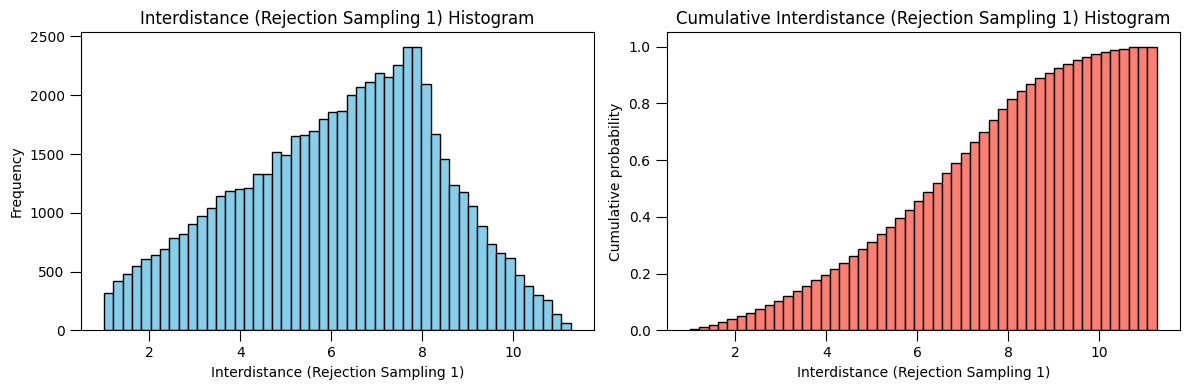

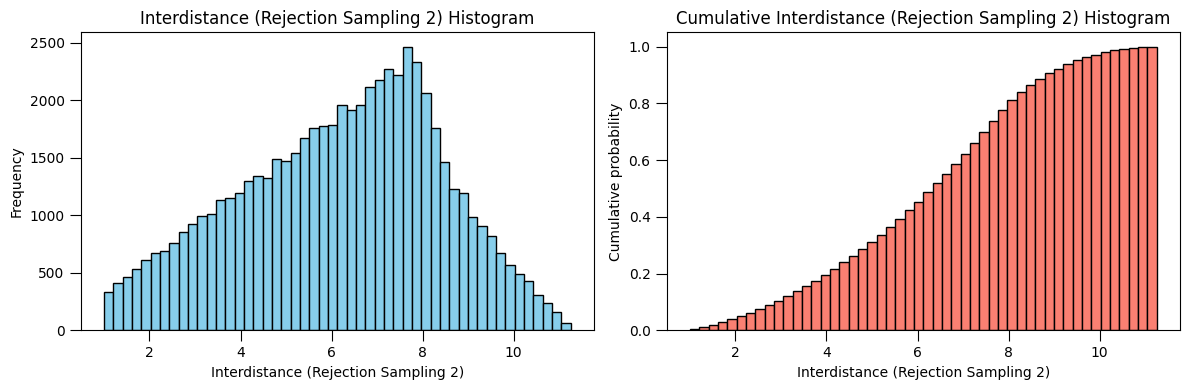

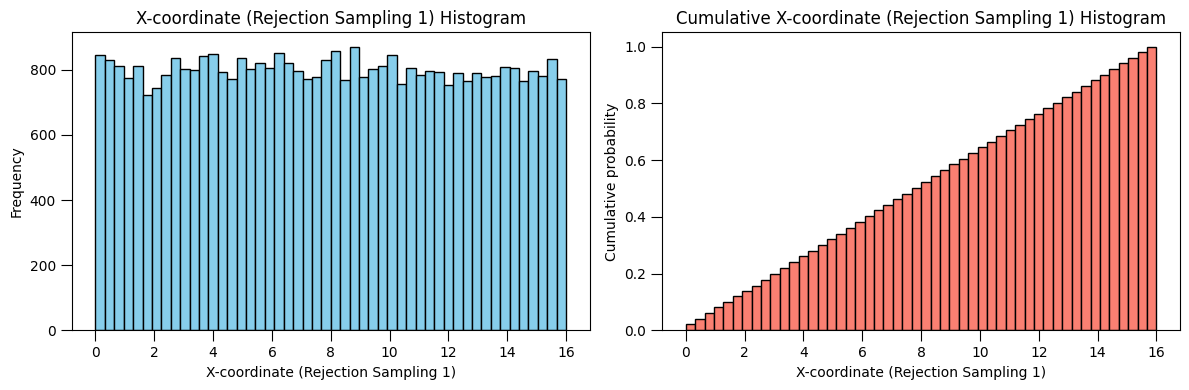

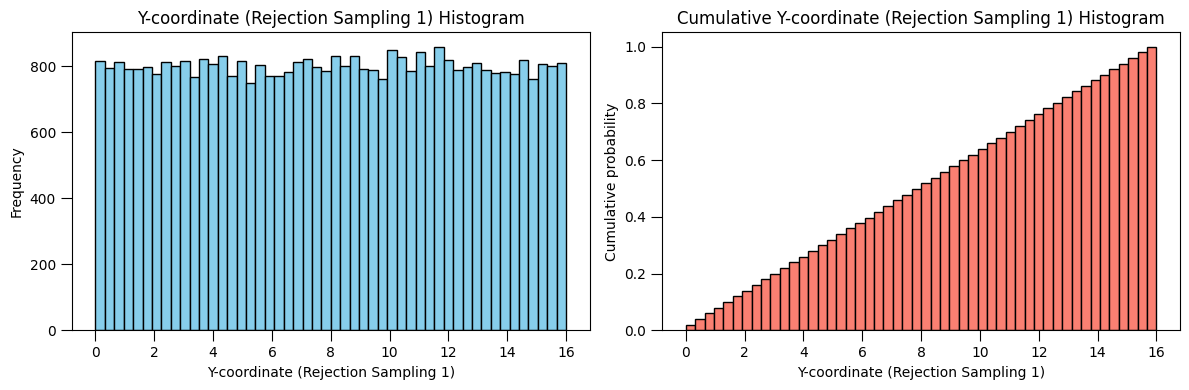

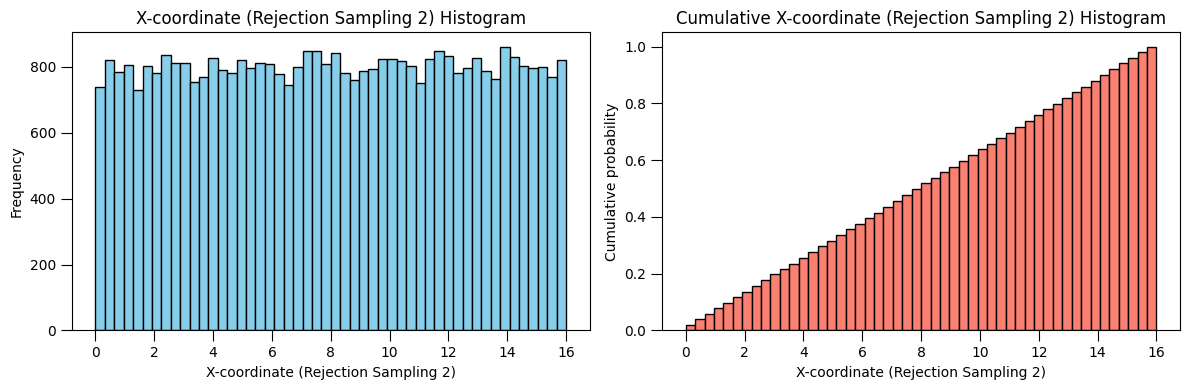

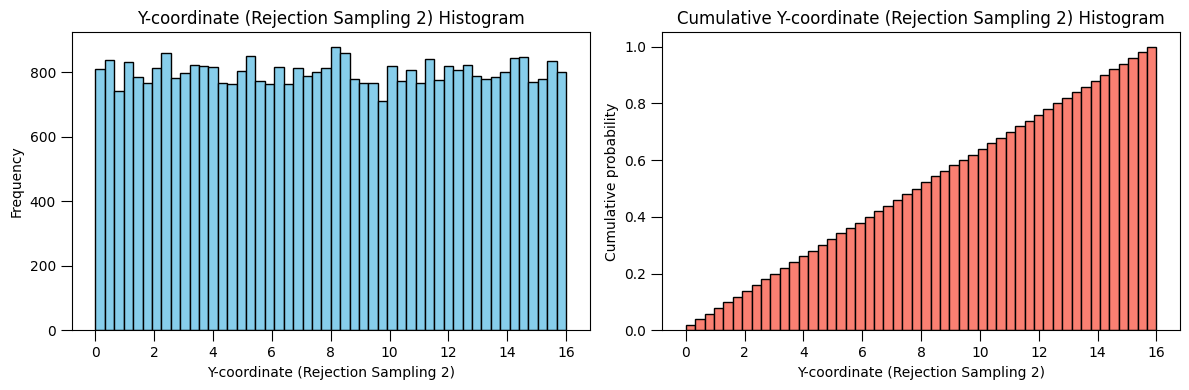

In [3]:


per_hard_sph = periodic_hard_sphere(N=4, d=2, sigma=1.0, L=16)

def compute_interdistances(config):
    interdistances = []
    for i in range(per_hard_sph.N):
        for j in range(i + 1, per_hard_sph.N):
            interdistances.append(per_hard_sph.get_periodic_distance(config[i], config[j]))
    return interdistances

def plot_histograms(configurations, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].hist(configurations, bins=50, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{title} Histogram')
    axes[0].set_xlabel(title)
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(configurations, bins=50, color='salmon', edgecolor='black', cumulative=True, density=True)
    axes[1].set_title(f'Cumulative {title} Histogram')
    axes[1].set_xlabel(title)
    axes[1].set_ylabel('Cumulative probability')
    
    plt.tight_layout()
    plt.show()

configurations_1 = [per_hard_sph.rejection_sampling_1() for _ in range(10000)]

configurations_2 = [per_hard_sph.rejection_sampling_2() for _ in range(10000)]

interdistances_1 = [item for sublist in [compute_interdistances(config) for config in configurations_1] for item in sublist]
interdistances_2 = [item for sublist in [compute_interdistances(config) for config in configurations_2] for item in sublist]

plot_histograms(interdistances_1, 'Interdistance (Rejection Sampling 1)')
plot_histograms(interdistances_2, 'Interdistance (Rejection Sampling 2)')

x_coordinates_1 = [item[0] for sublist in configurations_1 for item in sublist]
y_coordinates_1 = [item[1] for sublist in configurations_1 for item in sublist]

x_coordinates_2 = [item[0] for sublist in configurations_2 for item in sublist]
y_coordinates_2 = [item[1] for sublist in configurations_2 for item in sublist]

plot_histograms(x_coordinates_1, 'X-coordinate (Rejection Sampling 1)')
plot_histograms(y_coordinates_1, 'Y-coordinate (Rejection Sampling 1)')

plot_histograms(x_coordinates_2, 'X-coordinate (Rejection Sampling 2)')
plot_histograms(y_coordinates_2, 'Y-coordinate (Rejection Sampling 2)')


>  4. Do you have agreement betwee the two methods? 

There is an agreement between these 2 methods because there is no major differences between these two histograms

> 5. Is the obtained histograms consistent with the expression of $\pi$?

Firstly, for the spheres position, $\pi$? suggest that the spheres coodinates should be bounded in a box (0 to L for each dimension). Then here, the histograms for X and Y coordinates shows an uniform distribution between 0 and L which agree with $\pi$

Secondly, for the inter_distances between spheres, the fact that $||x_i-x_j||_2 - \sigma > 0$ $\forall$ i,j suppose that two spheres can not overlap. 
So, the interdistances histograms must start from sigma and the distribution should prove that there is no  overlapping.

> 6. Redo the experience with $L=3$. What happens?

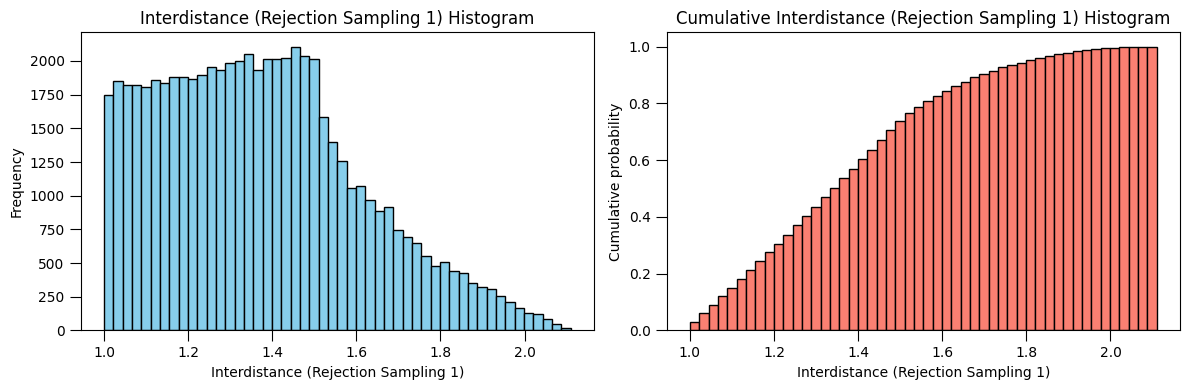

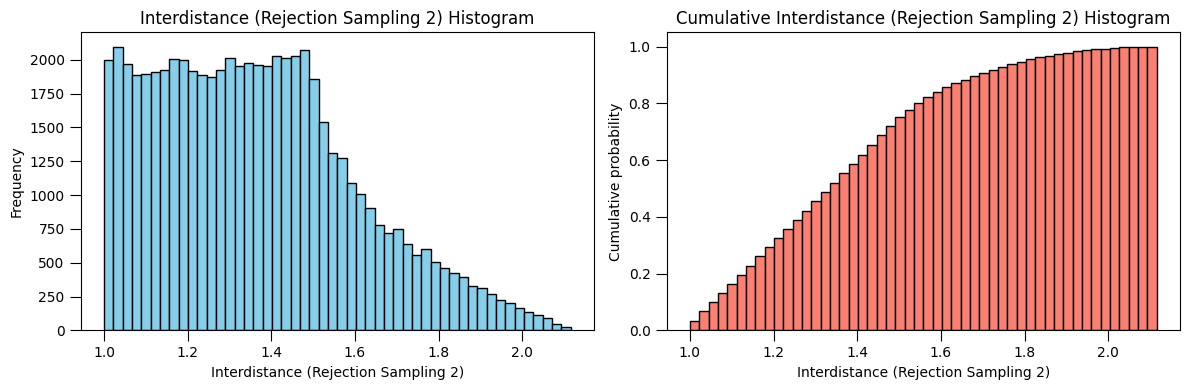

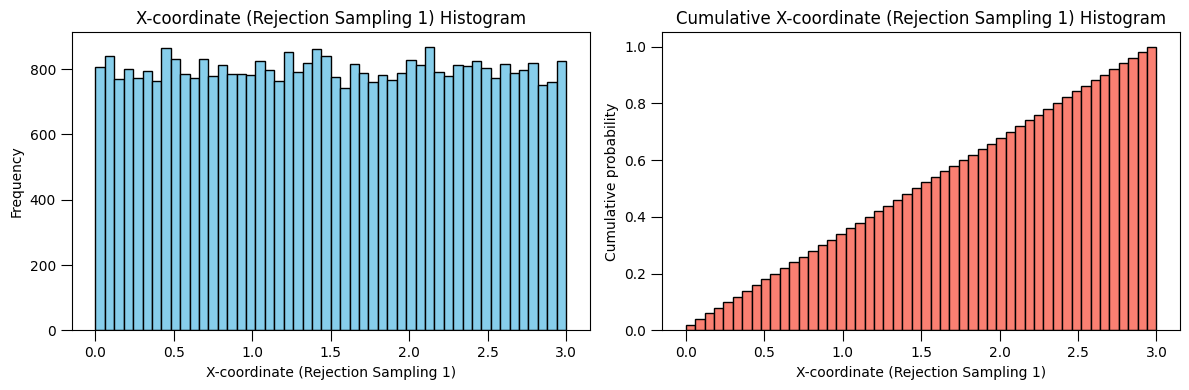

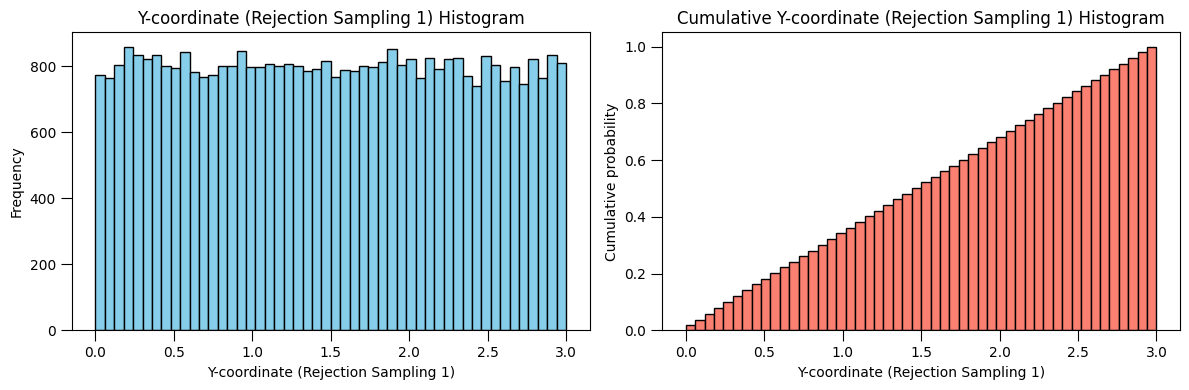

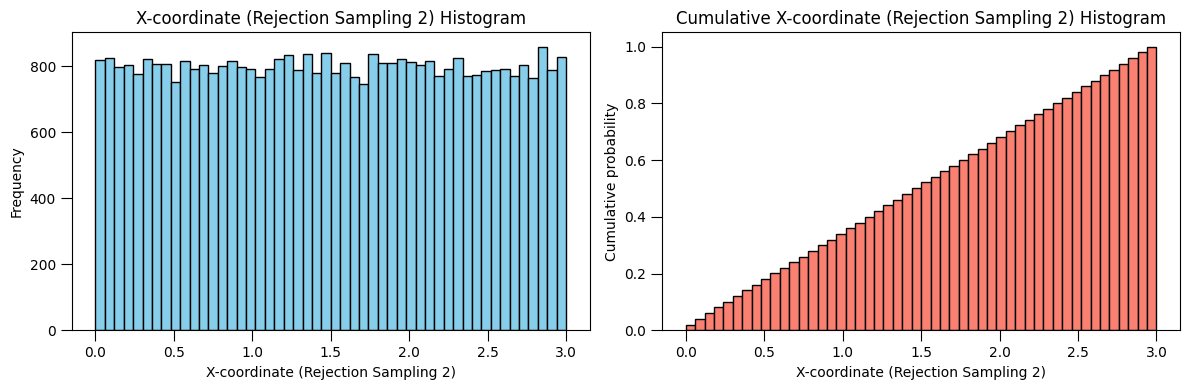

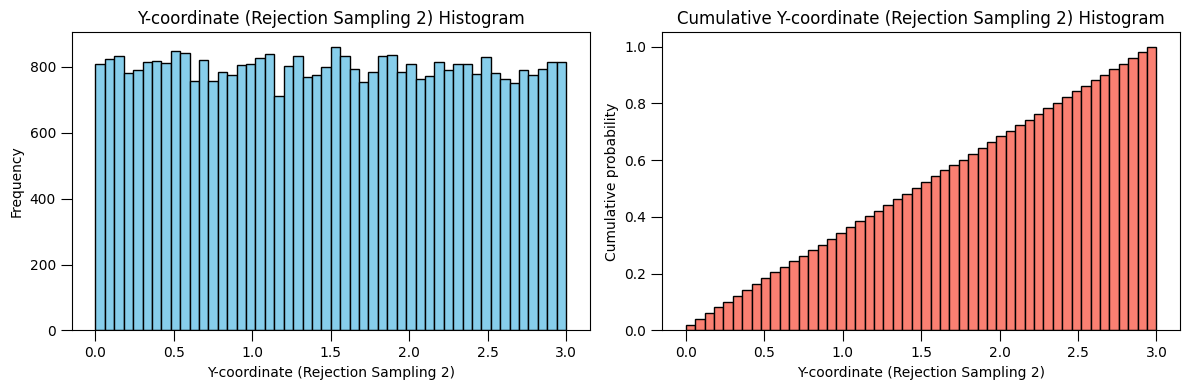

In [4]:


per_hard_sph = periodic_hard_sphere(N=4, d=2, sigma=1.0, L=3)




configurations_1 = [per_hard_sph.rejection_sampling_1() for _ in range(10000)]

configurations_2 = [per_hard_sph.rejection_sampling_2() for _ in range(10000)]

interdistances_1 = [item for sublist in [compute_interdistances(config) for config in configurations_1] for item in sublist]
interdistances_2 = [item for sublist in [compute_interdistances(config) for config in configurations_2] for item in sublist]

plot_histograms(interdistances_1, 'Interdistance (Rejection Sampling 1)')
plot_histograms(interdistances_2, 'Interdistance (Rejection Sampling 2)')

x_coordinates_1 = [item[0] for sublist in configurations_1 for item in sublist]
y_coordinates_1 = [item[1] for sublist in configurations_1 for item in sublist]

x_coordinates_2 = [item[0] for sublist in configurations_2 for item in sublist]
y_coordinates_2 = [item[1] for sublist in configurations_2 for item in sublist]

plot_histograms(x_coordinates_1, 'X-coordinate (Rejection Sampling 1)')
plot_histograms(y_coordinates_1, 'Y-coordinate (Rejection Sampling 1)')

plot_histograms(x_coordinates_2, 'X-coordinate (Rejection Sampling 2)')
plot_histograms(y_coordinates_2, 'Y-coordinate (Rejection Sampling 2)')


By doing the experience for L=3, the two methods seems to give the same results

>  7. Do you have agreement betwee the two methods? 

For the intersphere distances, X and Y coordinates, they are not big differences



However, While reducing,  the box size to $L=3$ and maintaining constant values for the other parameters, the box becomes relatively small compared to the sphere size. Under these conditions, finding valid configurations  becomes infrequent or even unattainable, depending on the specific geometry and spatial constraints. This is evident in the histograms of inter-sphere distances, where the distribution is now more concentrated on the left side of the graph. This shift suggests that spheres are more likely to be in close proximity, aligning with the observation that the box is too compact to accommodate all the spheres without causing overlaps.

In fact, we have agreement between these two methods because the configurations are still consistents

## 2) Adding hard walls

We consider now the stationary probability density for a configuration $x$ composed of the coordinates $(x_i)_i$ of $N$ spheres in dimension $d$ in a square box of size $L$ with **hard walls**: $$\pi(x) \propto \prod_{i=1}^N \left( \prod_{k=1}^d\mathbb{1}(x_{i,k} - \frac{\sigma}{2}>0)\mathbb{1}(x_{i,k} - L + \frac{\sigma}{2}<0)\prod_{j<i} \mathbb{1}(||x_i-x_j||_2 - \sigma > 0) \right)\, .$$

We set $d=2$, $N=4$, $\sigma=1$ and $L=3$. 

> 8. Create a class  ```hardwall_hard_sphere```  to simulate a system of spheres within hard walls in two dimensions, adapting the class for the periodic case.
> 9. Sample with both rejection methods 10000 configurations. Output the same histograms of interdistance and coordinates as previously done.

In [5]:
class hardwall_hard_sphere:
    def __init__(self, N=4, d=2, sigma=1.0, L=3):
        #  initialization part
        self.N = N  
        self.d = d  
        self.sigma = sigma  
        self.L = L  

    def get_distance(self, x_1, x_2):
        delta_x = x_1 - x_2
        d_sq = delta_x[0] ** 2.0 + delta_x[1] ** 2.0
        return d_sq ** 0.5

    def pair_overlap_check(self, x_1, x_2):
        d = self.get_distance(x_1, x_2)
        if d <= self.sigma:
            return True  # There is an overlap
        return False

    def within_hard_walls(self, x_i):
        for k in range(self.d):
            if x_i[k] - self.sigma / 2 <= 0 or x_i[k] - self.L + self.sigma / 2 >= 0:
                return False
        return True

    def generate_sphere_position(self):
        return np.random.uniform(self.sigma / 2, self.L - self.sigma / 2, size=2)
        

    def rejection_sampling_1(self):
        x = []
        while len(x) < self.N:
            overlapping_proposition = True
            while overlapping_proposition:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                if not self.within_hard_walls(x_i_new):
                    overlapping_proposition = True
                    continue
                for x_j in x:
                    if self.pair_overlap_check(x_j, x_i_new):
                        overlapping_proposition = True
                        break
            x += [x_i_new]
        return x

    def rejection_sampling_2(self):
        x = []
        while len(x) < self.N:
            while len(x) < self.N:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                if not self.within_hard_walls(x_i_new):
                    x = []
                    break
                for x_j in x:
                    if self.pair_overlap_check(x_j, x_i_new):
                        overlapping_proposition = True
                        break
                if overlapping_proposition:
                    x = []
                    break
                x += [x_i_new]
        return x



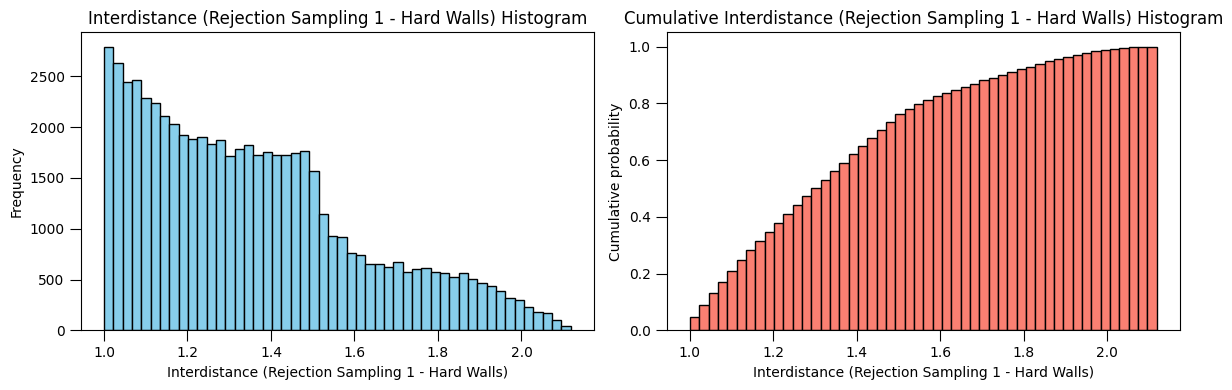

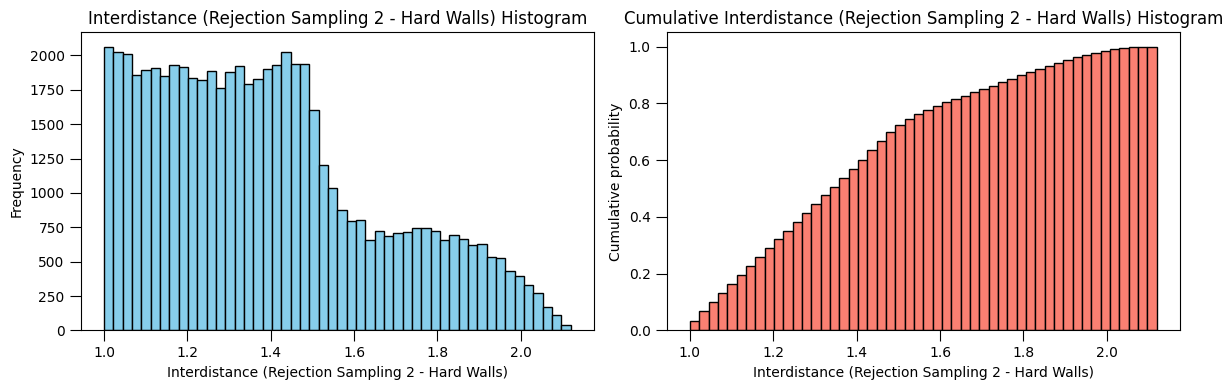

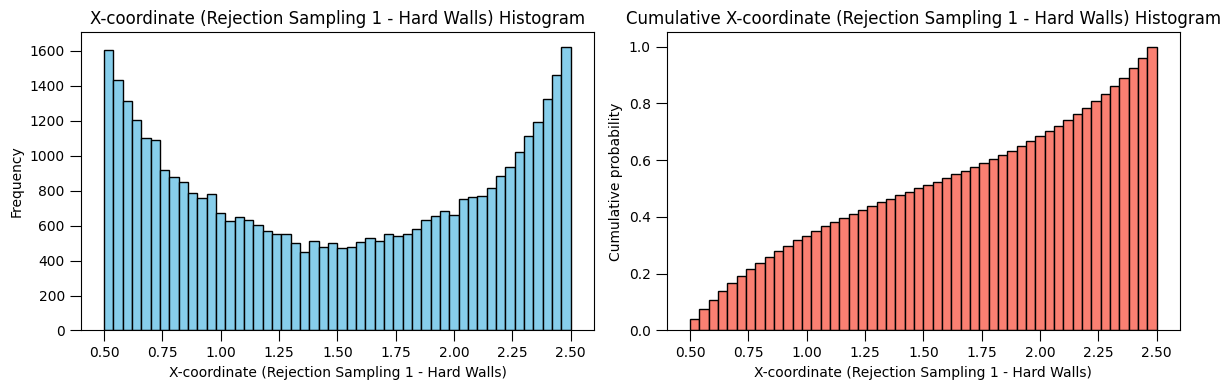

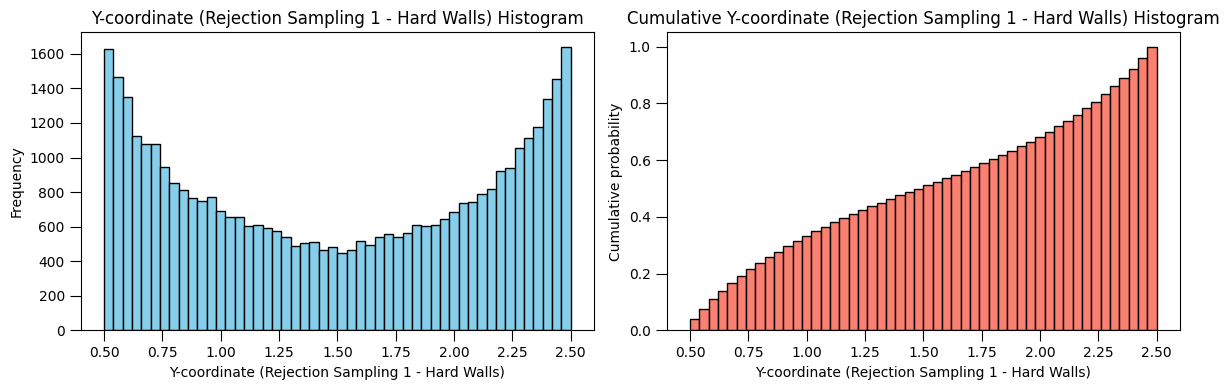

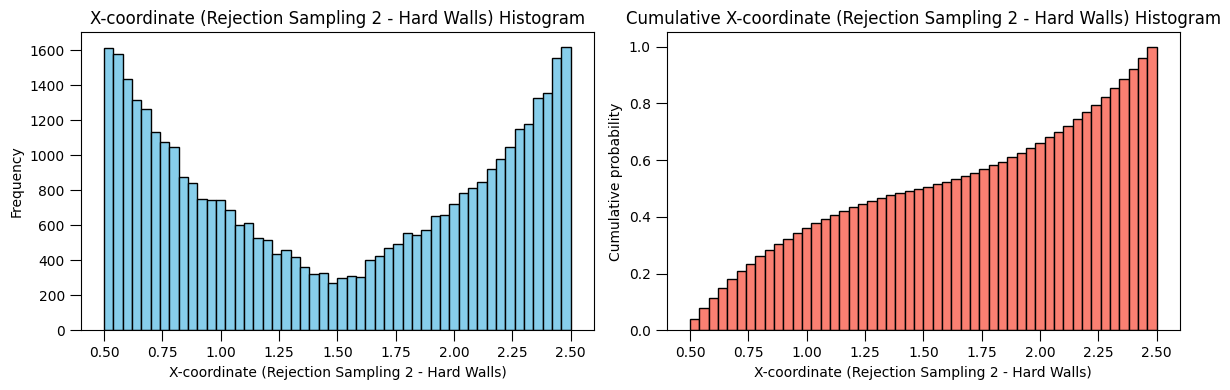

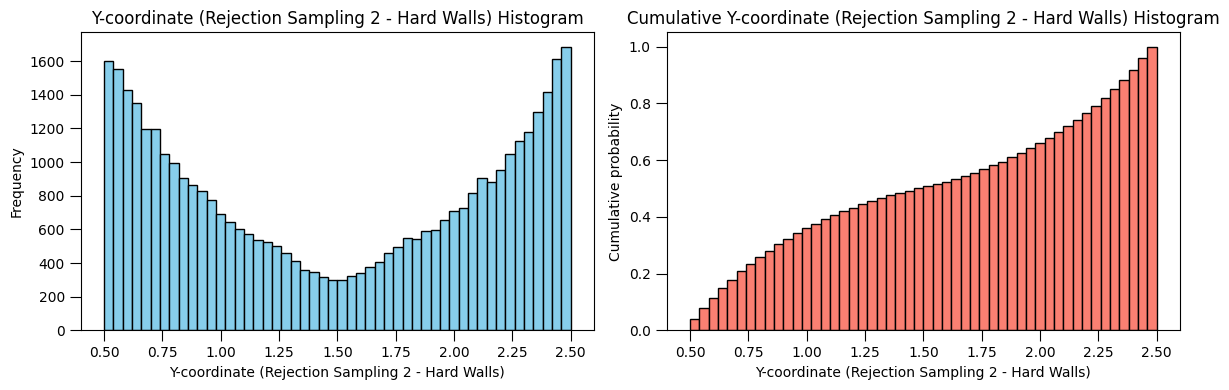

In [6]:
hardwall_hs = hardwall_hard_sphere(N=4, d=2, sigma=1.0, L=3)

#  10000 configurations using rejection_sampling_1
configurations_1_hw = [hardwall_hs.rejection_sampling_1() for _ in range(10000)]

#  10000 configurations using rejection_sampling_2
configurations_2_hw = [hardwall_hs.rejection_sampling_2() for _ in range(10000)]

interdistances_1_hw = [item for sublist in [compute_interdistances(config) for config in configurations_1_hw] for item in sublist]
interdistances_2_hw = [item for sublist in [compute_interdistances(config) for config in configurations_2_hw] for item in sublist]

plot_histograms(interdistances_1_hw, 'Interdistance (Rejection Sampling 1 - Hard Walls)')
plot_histograms(interdistances_2_hw, 'Interdistance (Rejection Sampling 2 - Hard Walls)')

x_coordinates_1_hw = [item[0] for sublist in configurations_1_hw for item in sublist]
y_coordinates_1_hw = [item[1] for sublist in configurations_1_hw for item in sublist]

x_coordinates_2_hw = [item[0] for sublist in configurations_2_hw for item in sublist]
y_coordinates_2_hw = [item[1] for sublist in configurations_2_hw for item in sublist]

plot_histograms(x_coordinates_1_hw, 'X-coordinate (Rejection Sampling 1 - Hard Walls)')
plot_histograms(y_coordinates_1_hw, 'Y-coordinate (Rejection Sampling 1 - Hard Walls)')

plot_histograms(x_coordinates_2_hw, 'X-coordinate (Rejection Sampling 2 - Hard Walls)')
plot_histograms(y_coordinates_2_hw, 'Y-coordinate (Rejection Sampling 2 - Hard Walls)')


> 10. Do you have agreement between the two methods? Is a method not correct?


They are some divergences between these two methods.
They come from the fact that some rejection methods are less robust under some very strict conditions.
But they are correct

> 11. Are both methods still correct in the periodic case though?


They are both consistent in periodic case and consistent in a system with less constraints

> 12. Comment the shape of the obtained stationary distribution of the x- and y-coordinates, for instance is it surprising it is not uniform anymore? (To go further: https://en.wikipedia.org/wiki/Depletion_force)


The distribution of X and Y are not uniform.
This phenomena is due to depletion forces which influences all the distribution.

> 13. Redo the simulations for $L=16$, are the effects observed in $L=3$ also present here?

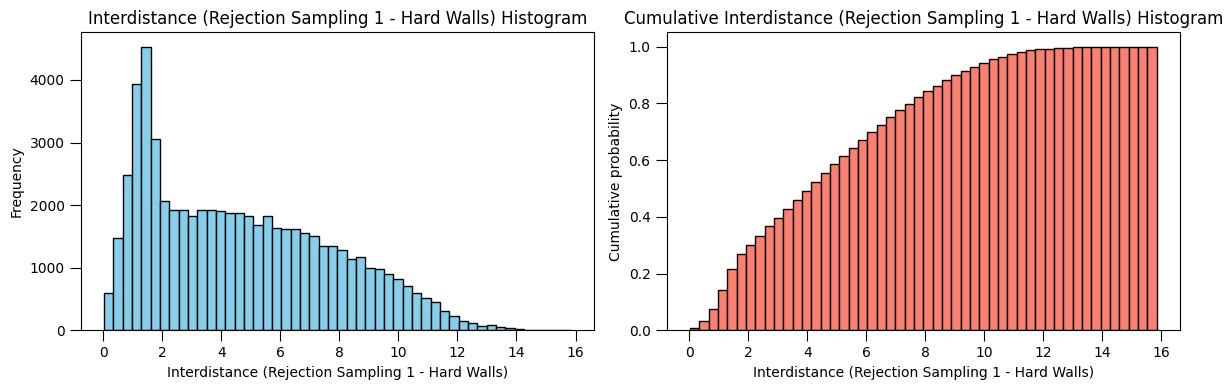

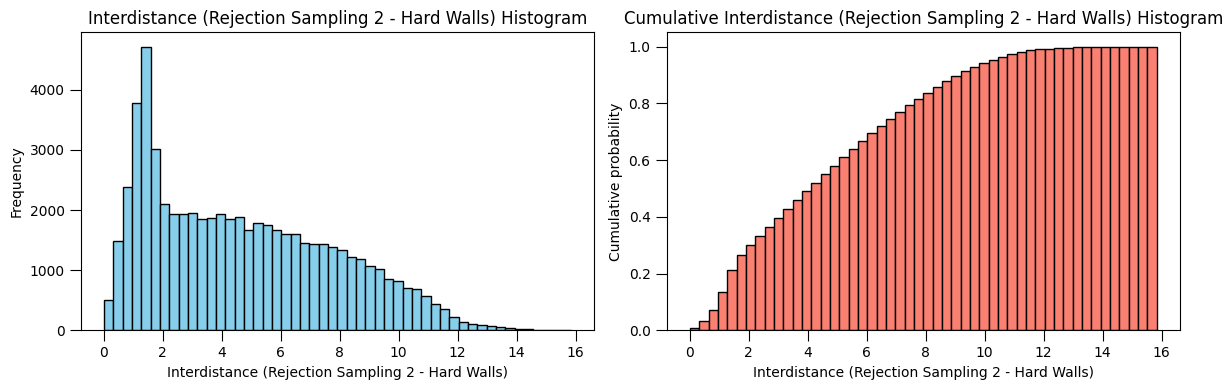

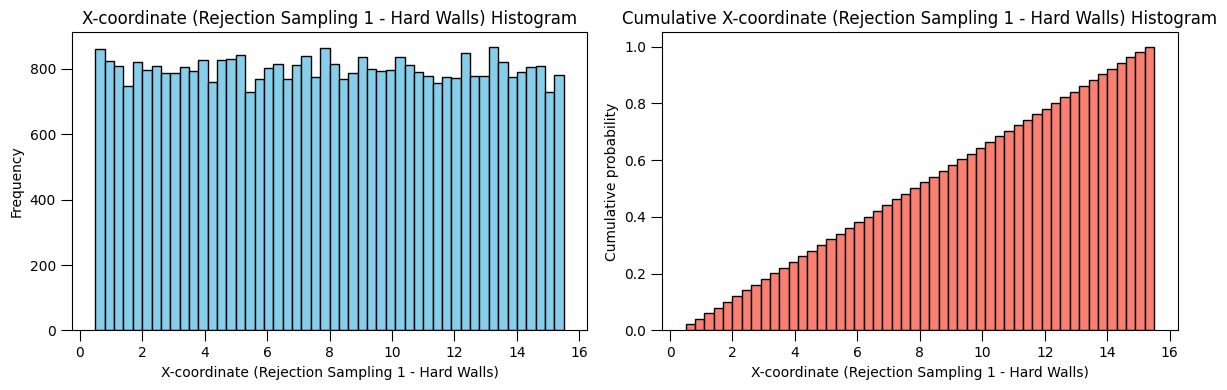

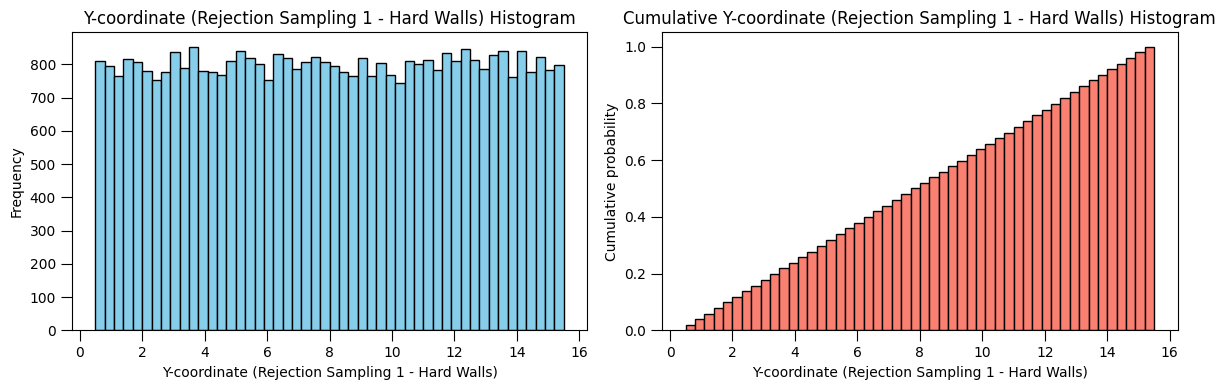

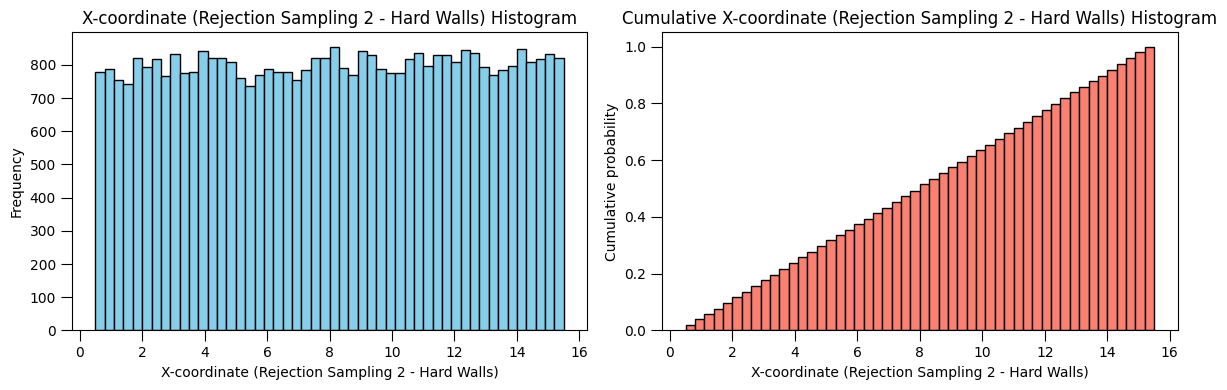

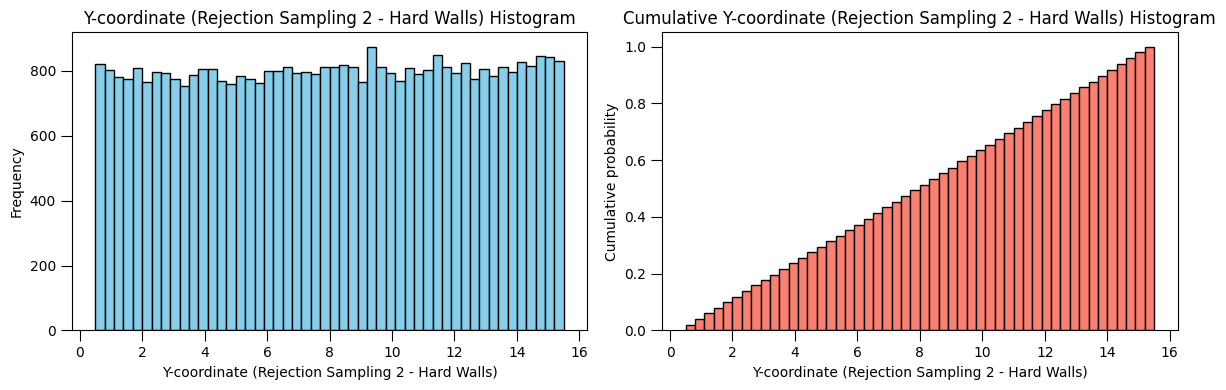

In [7]:
hardwall_hs = hardwall_hard_sphere(N=4, d=2, sigma=1.0, L=16)

#  10000 configurations using rejection_sampling_1
configurations_1_hw = [hardwall_hs.rejection_sampling_1() for _ in range(10000)]

#  10000 configurations using rejection_sampling_2
configurations_2_hw = [hardwall_hs.rejection_sampling_2() for _ in range(10000)]

interdistances_1_hw = [item for sublist in [compute_interdistances(config) for config in configurations_1_hw] for item in sublist]
interdistances_2_hw = [item for sublist in [compute_interdistances(config) for config in configurations_2_hw] for item in sublist]

plot_histograms(interdistances_1_hw, 'Interdistance (Rejection Sampling 1 - Hard Walls)')
plot_histograms(interdistances_2_hw, 'Interdistance (Rejection Sampling 2 - Hard Walls)')

x_coordinates_1_hw = [item[0] for sublist in configurations_1_hw for item in sublist]
y_coordinates_1_hw = [item[1] for sublist in configurations_1_hw for item in sublist]

x_coordinates_2_hw = [item[0] for sublist in configurations_2_hw for item in sublist]
y_coordinates_2_hw = [item[1] for sublist in configurations_2_hw for item in sublist]

plot_histograms(x_coordinates_1_hw, 'X-coordinate (Rejection Sampling 1 - Hard Walls)')
plot_histograms(y_coordinates_1_hw, 'Y-coordinate (Rejection Sampling 1 - Hard Walls)')

plot_histograms(x_coordinates_2_hw, 'X-coordinate (Rejection Sampling 2 - Hard Walls)')
plot_histograms(y_coordinates_2_hw, 'Y-coordinate (Rejection Sampling 2 - Hard Walls)')


Interpreting the results:

The distributions of inter-sphere distances remain similar for both rejection methods, indicating their coherence within a broader spatial context.

In contrast to the scenario with a box size of $L=3$, the histograms depicting X and Y coordinates in an $L=16$ box show a more even distribution. This suggests that the constraints imposed by hard walls are less restrictive in a larger space, facilitating a more uniform arrangement of spheres.

When examining a larger box size , the effects observed at $L=3$, such as non-uniform coordinate distributions, become less prominent. This underscores the substantial impact of box size on the arrangement of spheres and potential interactions.

The rejection methods demonstrate consistent and effective operation in the $L=16$ hard wall scenario, resulting in a more uniformly distributed arrangement of spheres compared to the more constrained conditions of $L=3$.

## 3) Markov-Chain Monte Carlo

We now consider a sampling based on a Markov chain for the hard-wall case which is defined as follows for $\delta >0$.
Given the current point $X^k= (X_i^k)_{i=1}^N \in \mathbb{R}^{d\times N}$:
- a) Sample from $i^{k+1} \in \{1,\ldots,N\}$ uniformly 
- b) Propose $Y^{k+1}_{i^{k+1}} = X^k_{i^{k+1}} + \delta Z^{k+1}$ where $Z^{k+1} \sim \mathrm{N}(0,\delta^2 \mathrm{Id})$ is independent from the past, and $Y^{k+1}_i = X^{k+1}_i$ for $i \neq i^{k+1}$.
- c) Set $X^{k+1}$ from $X^k$ and $Y^{k+1}$ using the Metropolis-Hastings accept-reject step seen in course.

> 14. Complete the class ```hardwall_hard_sphere``` to include a routine producing samples obtained by a Markov-chain Monte Carlo method. For instance, consider a Metropolis-like scheme with a Markov kernel proposing to move a single random sphere by a small Gaussian increment ($\mathcal{N}(0,\delta^2)$) each time.
> 15. For $N=4, L=3$, generate 10000 samples by the Markov-chain and rejection sampling scheme of your choice. Output also the averaged acceptance rates of the reject sampling and Markov-chain sampling scheme. Compare the obtained histograms of the interdistance between spheres and of the x- and y-coordinates of spheres.
> 16. What can you say about the apparent speed of convergence of both methods? Take into account the acceptance rates and the number of moved spheres between successive configurations in your analysis.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

class hardwall_hard_sphere:
    def __init__(self, N=4, d=2, sigma=1.0, L=3, delta=0.1):
        # Parameter initialization
        self.N = N  
        self.d = d  
        self.sigma = sigma  
        self.L = L  
        self.delta = delta  

    def get_distance(self, x_1, x_2):
        delta_x = x_1 - x_2
        d_sq = delta_x[0] ** 2.0 + delta_x[1] ** 2.0
        return d_sq ** 0.5

    def pair_overlap_check(self, x_1, x_2):
        d = self.get_distance(x_1, x_2)
        if d < self.sigma:
            return True  
        return False

    def within_hard_walls(self, x_i):
        for k in range(self.d):
            if x_i[k] - self.sigma / 2 <= 0 or x_i[k] - self.L + self.sigma / 2 >= 0:
                return False
        return True

    def generate_sphere_position(self):
        x_i_new = np.random.uniform(low=self.sigma / 2, high=self.L - self.sigma / 2, size=2)
        return x_i_new

    def rejection_sampling_1(self):
        x = []
        while len(x) < self.N:
            overlapping_proposition = True
            while overlapping_proposition:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                if not self.within_hard_walls(x_i_new):
                    overlapping_proposition = True
                    continue
                for x_j in x:
                    if self.pair_overlap_check(x_j, x_i_new):
                        overlapping_proposition = True
                        break
            x += [x_i_new]
        return x

    def rejection_sampling_2(self):
        x = []
        while len(x) < self.N:
            while len(x) < self.N:
                x_i_new = self.generate_sphere_position()
                overlapping_proposition = False
                if not self.within_hard_walls(x_i_new):
                    x = []
                    break
                for x_j in x:
                    if self.pair_overlap_check(x_j, x_i_new):
                        overlapping_proposition = True
                        break
                if overlapping_proposition:
                    x = []
                    break
                x += [x_i_new]
        return x

    def acceptance_probability(self, X_k, Y_k, i_k1):
        # Metropolis-Hastings acceptance probability
        numerator = 1.0
        denominator = 1.0

        for j in range(self.N):
            if j != i_k1:
                numerator *= np.exp(-self.get_distance(X_k[j], Y_k[j]) ** 2 / (2 * self.delta ** 2))
                denominator *= np.exp(-self.get_distance(Y_k[j], X_k[j]) ** 2 / (2 * self.delta ** 2))

        accept_prob = min(1.0, numerator / denominator)
        return accept_prob

    def metropolis_step(self, X_k):
        Y_k = np.copy(X_k)

        i_k1 = np.random.randint(0, self.N)

        Z_k1 = np.random.normal(0, self.delta, size=self.d)
        Y_k[i_k1] = X_k[i_k1] + Z_k1

        accept_prob = self.acceptance_probability(X_k, Y_k, i_k1)
        if np.random.rand() < accept_prob:
            return Y_k, 1 
        else:
            return X_k, 0  

    def metropolis_sampling(self, num_samples):
        samples = []
        acceptance_count = 0
        X_k = np.array([self.generate_sphere_position() for _ in range(self.N)])

        for _ in range(num_samples):
            X_k, accepted = self.metropolis_step(X_k)
            acceptance_count += accepted
            samples.append(np.copy(X_k))
        acceptance_rate = acceptance_count / num_samples
        return samples, acceptance_rate



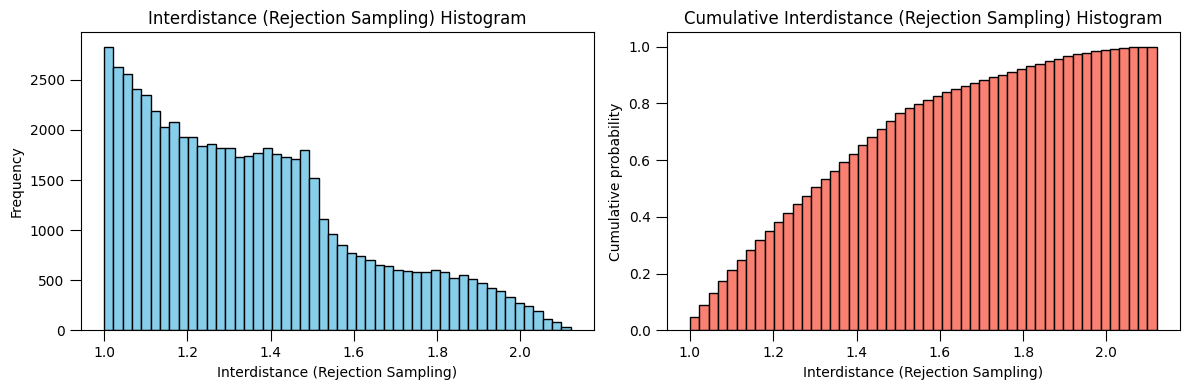

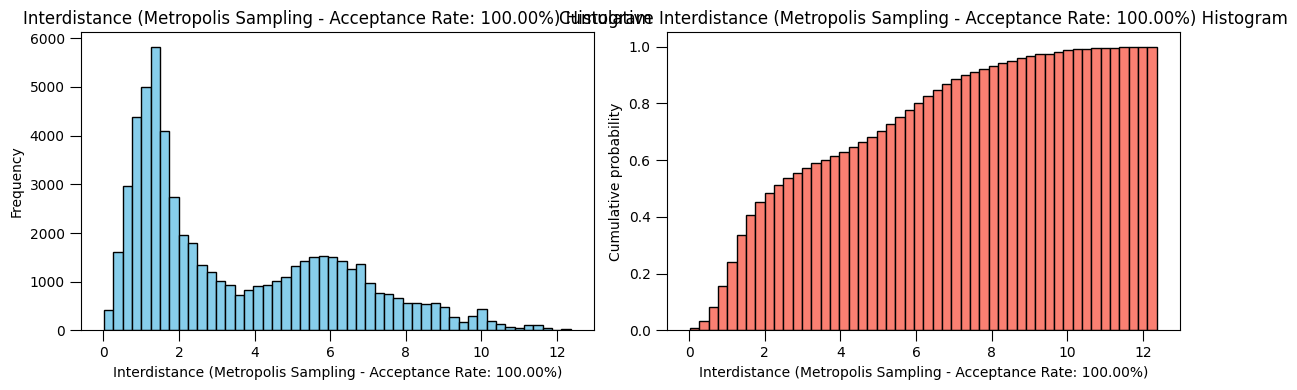

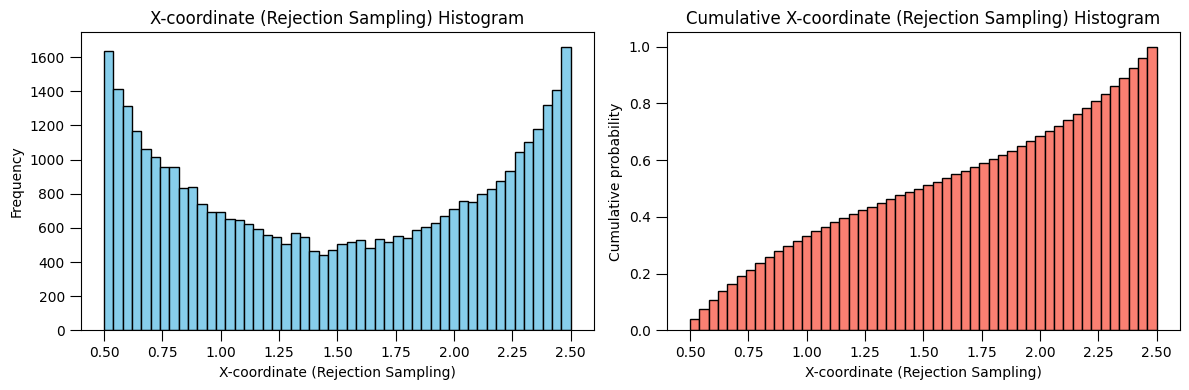

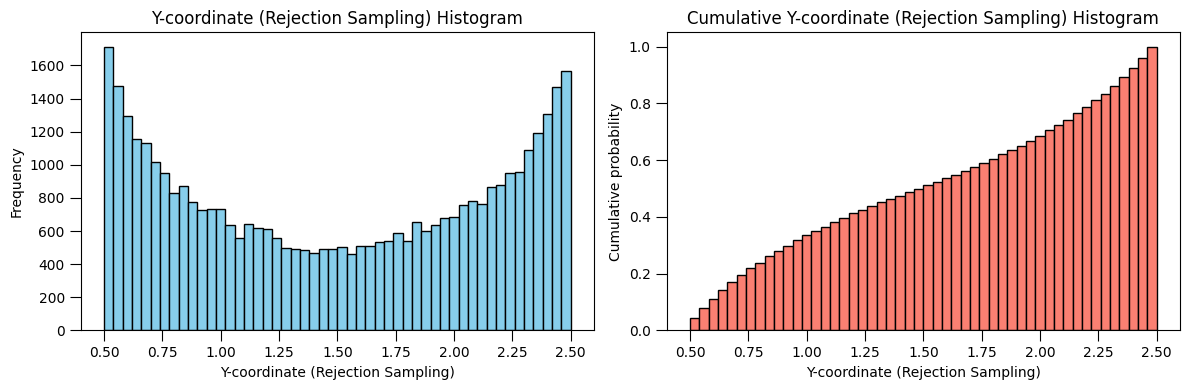

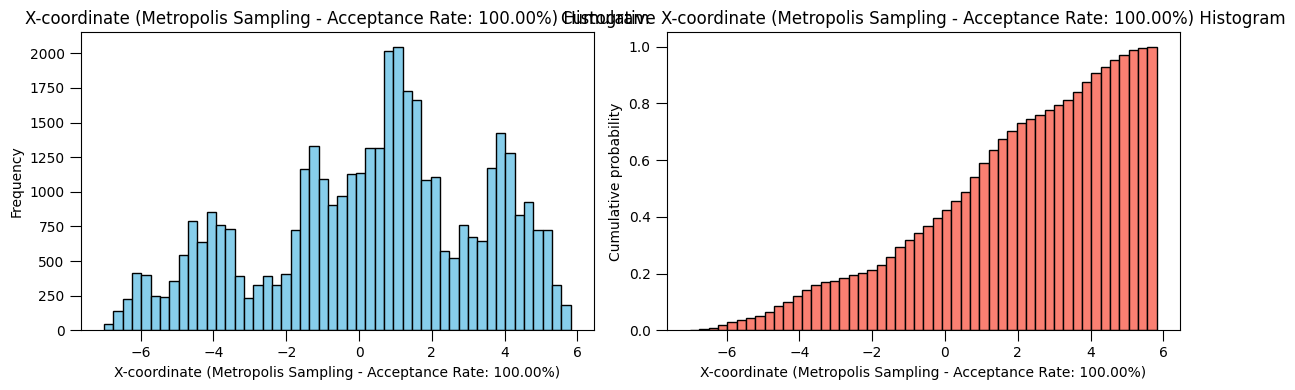

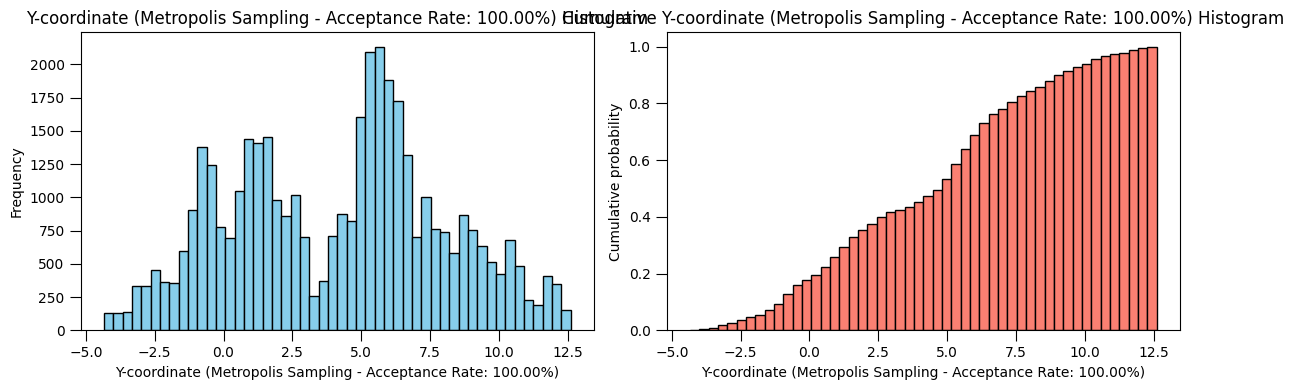

In [9]:

hardwall_hs = hardwall_hard_sphere(N=4, d=2, sigma=1.0, L=3, delta=0.1)

configurations_rejection = [hardwall_hs.rejection_sampling_1() for _ in range(10000)]

configurations_metropolis, acceptance_rate_metropolis = hardwall_hs.metropolis_sampling(10000)

interdistances_rejection = [item for sublist in [compute_interdistances(config) for config in configurations_rejection] for item in sublist]
interdistances_metropolis = [item for sublist in [compute_interdistances(config) for config in configurations_metropolis] for item in sublist]

plot_histograms(interdistances_rejection, 'Interdistance (Rejection Sampling)')
plot_histograms(interdistances_metropolis, f'Interdistance (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')

x_coordinates_rejection = [item[0] for sublist in configurations_rejection for item in sublist]
y_coordinates_rejection = [item[1] for sublist in configurations_rejection for item in sublist]

x_coordinates_metropolis = [item[0] for sublist in configurations_metropolis for item in sublist]
y_coordinates_metropolis = [item[1] for sublist in configurations_metropolis for item in sublist]

plot_histograms(x_coordinates_rejection, 'X-coordinate (Rejection Sampling)')
plot_histograms(y_coordinates_rejection, 'Y-coordinate (Rejection Sampling)')
plot_histograms(x_coordinates_metropolis, f'X-coordinate (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')
plot_histograms(y_coordinates_metropolis, f'Y-coordinate (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')


In [10]:
print("the acceptance rate is:")
print(acceptance_rate_metropolis)

the acceptance rate is:
1.0


> 17. For $N=4, L =2.5$, redo the simulations (you can choose to generate only 1000 configurations). What can you say about the acceptance rates of both methods? How did you choose the $\delta$ value?
> 18. Comment the stationary distribution for a sphere position.

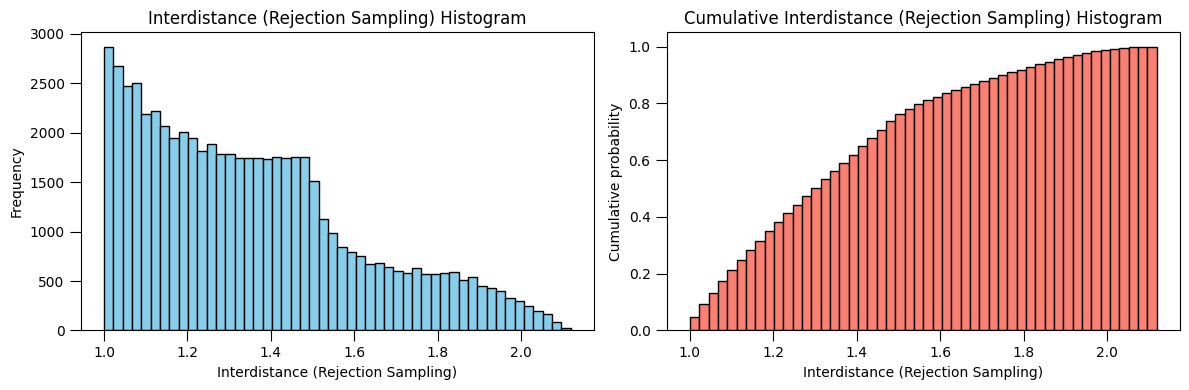

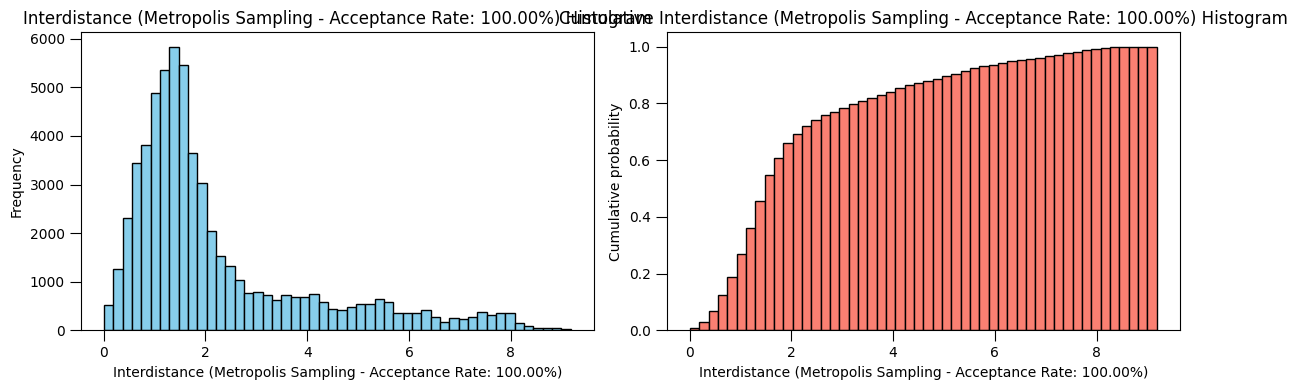

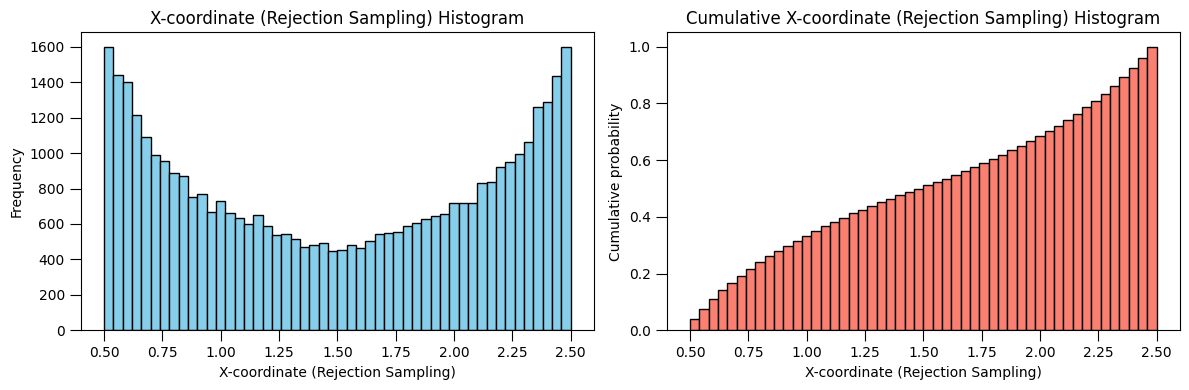

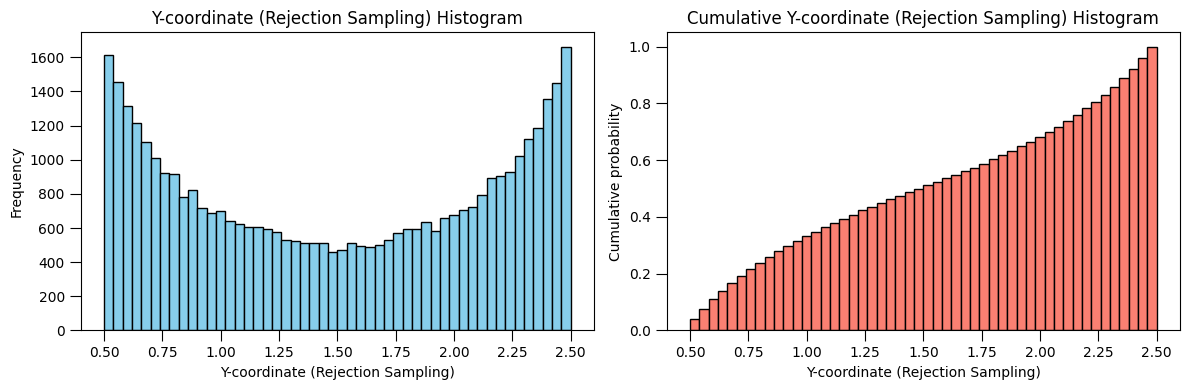

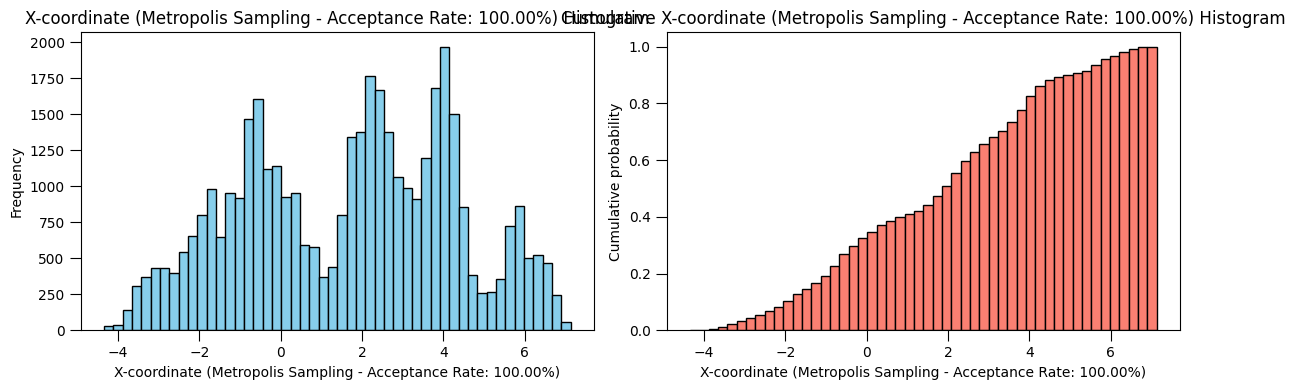

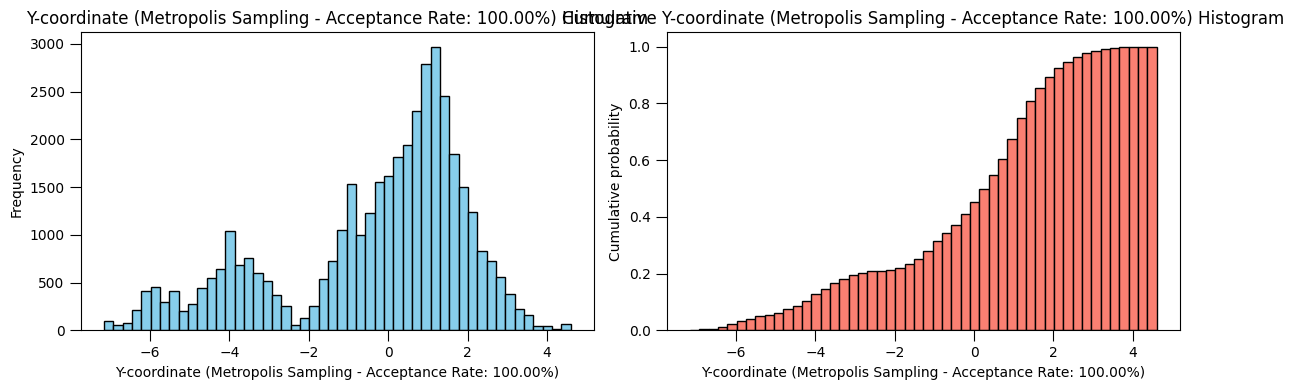

In [11]:

hardwall_hs = hardwall_hard_sphere(N=4, d=2, sigma=1.0, L=3, delta=0.1)

configurations_rejection = [hardwall_hs.rejection_sampling_1() for _ in range(10000)]

configurations_metropolis, acceptance_rate_metropolis = hardwall_hs.metropolis_sampling(10000)

interdistances_rejection = [item for sublist in [compute_interdistances(config) for config in configurations_rejection] for item in sublist]
interdistances_metropolis = [item for sublist in [compute_interdistances(config) for config in configurations_metropolis] for item in sublist]

plot_histograms(interdistances_rejection, 'Interdistance (Rejection Sampling)')
plot_histograms(interdistances_metropolis, f'Interdistance (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')

x_coordinates_rejection = [item[0] for sublist in configurations_rejection for item in sublist]
y_coordinates_rejection = [item[1] for sublist in configurations_rejection for item in sublist]

x_coordinates_metropolis = [item[0] for sublist in configurations_metropolis for item in sublist]
y_coordinates_metropolis = [item[1] for sublist in configurations_metropolis for item in sublist]

plot_histograms(x_coordinates_rejection, 'X-coordinate (Rejection Sampling)')
plot_histograms(y_coordinates_rejection, 'Y-coordinate (Rejection Sampling)')
plot_histograms(x_coordinates_metropolis, f'X-coordinate (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')
plot_histograms(y_coordinates_metropolis, f'Y-coordinate (Metropolis Sampling - Acceptance Rate: {acceptance_rate_metropolis:.2%})')


In [12]:
acceptance_rate_metropolis

1.0

The stationnary distribution for the position of a sphere is not uniform, contrary to the anticipated uniformity in an unrestricted space. This deviation from uniformity may be attributed to depletion forces, a phenomenon in which the existence of particles within a confined space gives rise to regions of reduced concentration around them, consequently impacting the overall distribution.

## The following are **optional questions**

> 19. Complete the class ```periodic_hard_sphere``` to include a routine producing samples obtained by a Markov-chain Monte Carlo method similar to the previously coded one.
> 15. For $N=4, L=2.5$ generate 10000 samples by the Markov-chain and rejection sampling scheme of your choice. Output also the averaged acceptance rates of the reject sampling and Markov-chain sampling scheme. Compare the obtained histograms of the interdistance between spheres and of the x- and y-coordinates of spheres. 
> 16. What can you say about the apparent speed of convergence and acceptance rates of both methods compared to the hardwall case? Is it surprising?

----------------------------------------------------------------------------------------------------------------------------------